In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [ ]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [ ]:
X = df['log.Te'].values
Y = df['log.light'].values

In [ ]:
XY = np.c_[X, Y]
print(XY[:10])

[[4.37 5.23]
 [4.56 5.74]
 [4.26 4.93]
 [4.56 5.74]
 [4.3  5.19]
 [4.46 5.46]
 [3.84 4.65]
 [4.57 5.27]
 [4.26 5.57]
 [4.37 5.12]]


In [23]:
# qf = af.averaging_function("WM", rhofunc=func.Power(1.1, 0.01), alpha=0.86)
qf = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.87)
amf = af.averaging_function("AM")

In [24]:
c = pca.find_rob_center(XY, qf)
print(c)

[4.3882749  4.95279837]


In [25]:
N = len(XY)
(N - 6) / N

0.8723404255319149

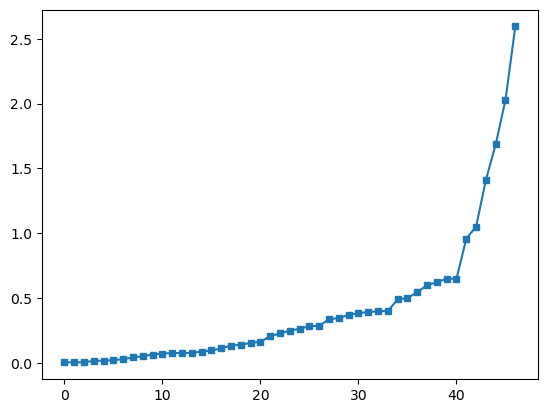

In [26]:
Z = pca.distance_center(XY, c)
plt.plot(sorted(Z), marker='s', markersize=4)
plt.show()

In [27]:
XY2 = XY - c
S = XY2.T @ XY2
X2 = XY2[:,0]
Y2 = XY2[:,1]
print(S)

[[ 4.17856709 -1.82626771]
 [-1.82626771 15.17642555]]


In [28]:
a0, _ = pca.find_pc(XY2)
print(a0)

[-0.1596401   0.98717528]


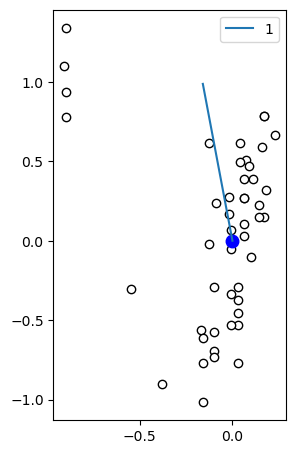

In [29]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(XY2[:,0], XY2[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([0, a0[0]], [0, a0[1]], label='1')
plt.legend()
plt.show()

In [30]:
a1, L1 = pca.find_rob_pc(XY2, qf, verbose=1)
print(a1)

* 0.020570911239114018 8.085412055181232 [0.88951063 0.75531932]
* 0.02031793838857044 12.14764276944336 [0.209793   0.97774582]
* 0.020316844043360448 12.17819292296794 [0.17983039 0.98369763]
* 0.020316831493988437 12.17970716916476 [0.17803269 0.98402457]
* 0.020316830955496298 12.179788028465811 [0.17793547 0.98404216]
* 0.020316830926983023 12.179792367241985 [0.17793025 0.9840431 ]
* 0.020316830925453826 12.179792600115281 [0.17792997 0.98404315]
* 0.020316830925371728 12.179792612614369 [0.17792996 0.98404316]
K: 7
[0.17792995 0.98404316]


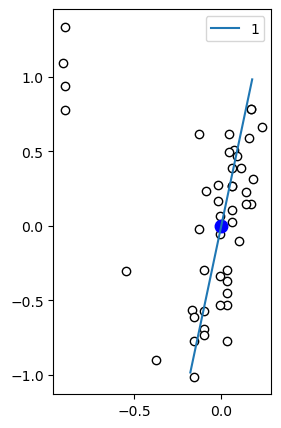

In [31]:
plt.figure(figsize=(5/(16/9),5))
plt.scatter(X2, Y2, c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-a1[0], 0, a1[0]], [-a1[1], 0, a1[1]], label='1')
plt.legend()
plt.show()

In [32]:
Z = pca.distance_line(XY2, a1)
print(Z)

[4.53006526e-03 8.36260156e-04 1.49258803e-02 8.36260156e-04
 1.66594733e-02 3.86742317e-04 2.35855202e-01 1.49782530e-02
 5.57180404e-02 2.27848363e-03 1.04495154e+00 2.24749573e-03
 5.08696490e-05 4.47762311e-02 7.05584693e-04 9.51617202e-03
 5.98185959e-04 2.84674004e-02 3.32892749e-04 1.10396525e+00
 2.71571230e-05 1.13434526e-03 1.58809551e-02 1.40168556e-02
 4.04011504e-04 6.94163459e-03 1.98997516e-03 1.56639530e-06
 4.28384266e-03 1.18593566e+00 7.50959777e-03 2.03899363e-02
 1.74160611e-04 1.25859115e+00 2.18221101e-03 1.19491892e-02
 1.28305549e-02 1.74160611e-04 9.80845475e-03 4.72784887e-03
 2.60834351e-03 1.73603766e-03 1.68490183e-03 6.64975351e-05
 2.98812256e-03 3.12483031e-03 1.24959455e-02]


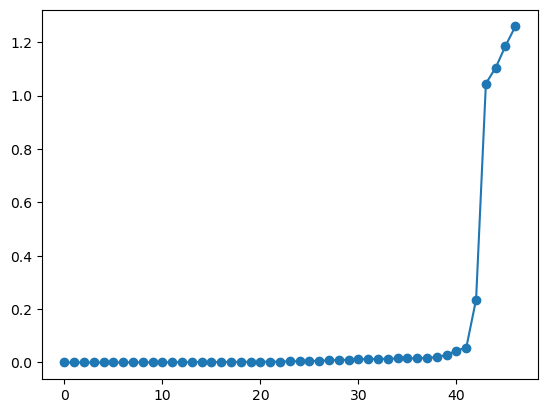

In [33]:
plt.plot(sorted(Z), marker='o')
plt.show()

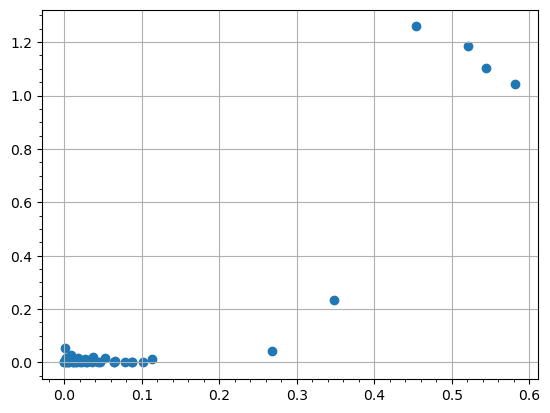

In [34]:
plt.scatter(pca.distance_line(XY2, a0), pca.distance_line(XY2, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [35]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [36]:
S = robust_scatter_matrix(XY2, qf)
print(S)

[[ 4.8694546  -0.83266082]
 [-0.83266082  0.34774409]]


In [37]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.98447488  0.1755255 ]
 [-0.1755255   0.98447488]]


0.0

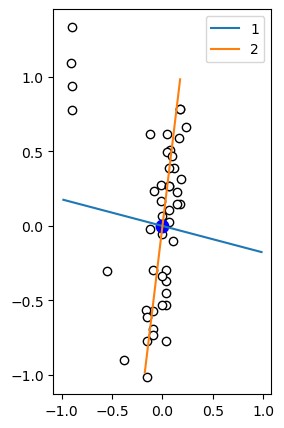

In [38]:
plt.figure(figsize=(5/(1920/1080),5))
plt.scatter(X2, Y2, c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()